# Exercise 1

Assign the values of a and b to be used later in the program, and import libraries used later

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
a=4
b=3

Created the for 4 matrixes used to make up each part of the diagram and defined the matrix A to be used for transformation of the diagram

In [20]:
part1=np.matrix([
    [a,a],
    [a,-a],
    [-a,-a],
    [-a,a],
    [a,a]
])
part2=np.matrix([
    [1-a,a-1],
    [-a/4,a-1],
    [-a/4,a/2],
    [1-a,a/2],
    [1-a,a-1]
])
part3=np.matrix([
    [a/4,a-1],
    [a-1,a/2],
    [a-1,a-1],
    [a/4,a/2],
    [a/4,a-1]
])
part4=np.matrix([
    [a-1,-a/4],
    [a-1,-a/2],
    [1-a,-a/2],
    [1-a,-a/4],
    [a-1,-a/4]
])

#put these 4 matrixes into a list to allow them to be cycled through using a loop
listOfMatrixes=[part1,part2,part3,part4]

A=np.matrix([
    [b,1],
    [-1,1]
])
A=A/b

A function which displays the diagram by looping through a list of matrixes. I used a list of colours to make it easier to see which original shape maps to which image in the second diagram

In [21]:
def showFig(listOfMatrixes,figureTitle):
    colours=['red','blue','green','black']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title(figureTitle)
    
    ax.set_xlim(-6,6) #used this range because in the tranformed diagram the extreme x and y coordinates are +/- 5.3
    ax.set_ylim(-6,6)
    for i in range(0,4):
        ax.add_patch(patches.Polygon(listOfMatrixes[i],fc='None',ec=colours[i]))
    fig.show()

Created a function to transform a single matrix and called it through a loop

Split each pair of co-ordinates from the 5x2 matrix into 2x1 matrices so they can be transformed by the 2x2 matrix. Then put them bacl into a 5x2 matrix to allow the diagram to be easily plotted in the same way as the initial one. 

In [22]:
def transform(matrix5x2):
    tempList=[]
    for i in range(0,5):
        matrix2x1=np.matrix([
            [matrix5x2[i,0]],
            [matrix5x2[i,1]]
        ])
        tempList.append(A*matrix2x1)
        
    #take each pair out the list and then each number out of the pair and put them back into a 5x2 matrix
    transformedMatrix=np.matrix([
            [tempList[0][0,0],tempList[0][1,0]],
            [tempList[1][0,0],tempList[1][1,0]],
            [tempList[2][0,0],tempList[2][1,0]],
            [tempList[3][0,0],tempList[3][1,0]],
            [tempList[4][0,0],tempList[4][1,0]]
        ])
    return transformedMatrix       





#### The two plotted diagrams

Called the transformation method then the plotting method to output the images

C:\Users\kitsq\AppData\Local\Temp\ipykernel_13448\4228178928.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


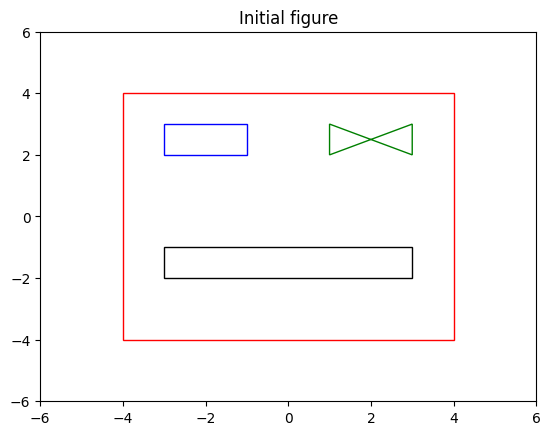

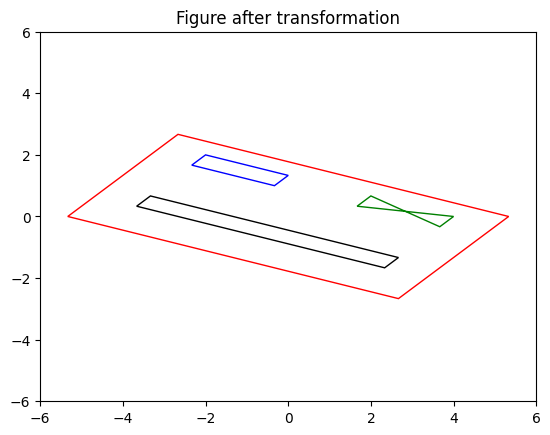

In [23]:
transformedMatrixes=[]
for matrix in listOfMatrixes:
   transformedMatrixes.append(transform(matrix))
   
showFig(listOfMatrixes,"Initial figure")
showFig(transformedMatrixes,"Figure after transformation")

# Exercise 2



Already imported matplotlib and numpy from previous exercise. The equation uses the aditional math library which is imported here.

In [24]:
import math

I created a function to output the values of x and y using Euler's method

In [25]:
def eulerMethod(step):
    listX=[]
    listY=[]
    x=0#initial x value
    y=-3 #inital y value
    
    while (x<=5):
        listY.append(y)
        listX.append(x)
        y=y+step*(x+y/5)#use the formula to get the next value for y in the sequence
        x+=step
        
    return(listX,listY)

A function to plot the graphs using the lists generated by the eulerMethod function. Also plots the exact solution which is $ y=-5x-25+22e^{x/5} $ to compare the two methods

In [26]:
def plotGraphs(step):
    x,yEulers=eulerMethod(step)
    yExact = [(-5*xi-25+22*math.exp(xi/5))for xi in x]
    plt.plot(x,yEulers,"bo",label="Eulers method")
    plt.plot(x,yExact,"-r",label="$ y=-5x-25+22e^{x/5} $")
    plt.title("Solutions using step "+str(step))
    plt.legend()
    plt.show()

#### Solutions for $ \frac{dy}{dx} = x + \frac{y}{5} $ 

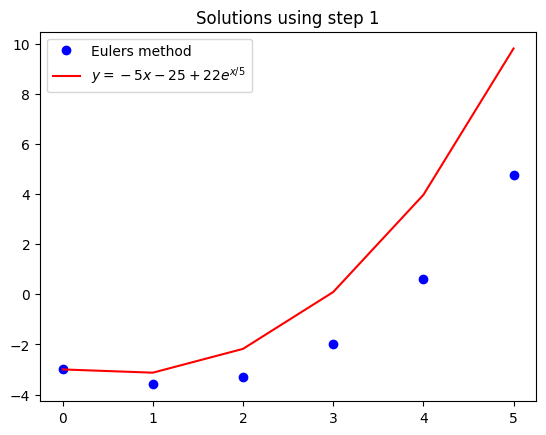

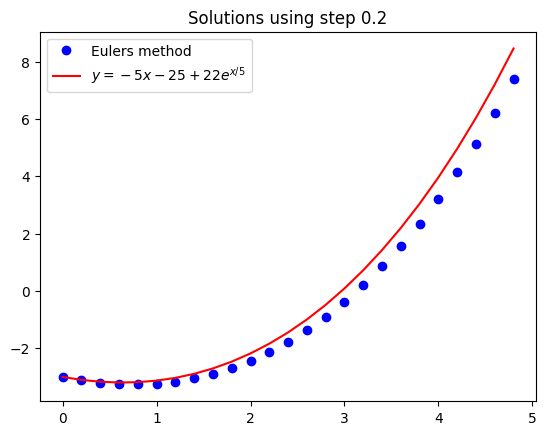

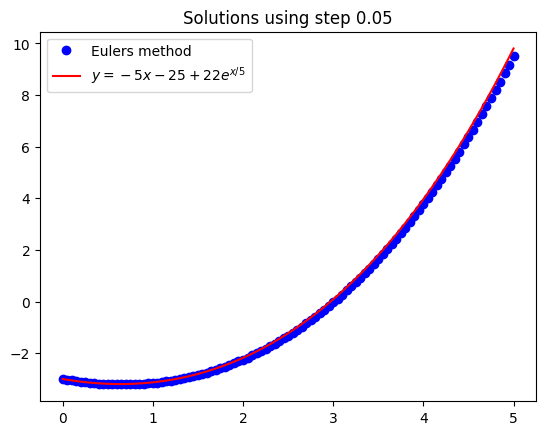

In [27]:
plotGraphs(1)
plotGraphs(0.2)
plotGraphs(0.05)

#### Conclusion

The smaller the step the closer the lines are to each other. This is likey because a smaller step leads to a smaller error. Although as you get further through the errors add up to make the result yielded by Eulers method further from the actual answer.